# `uproot` and `JaggedArray`


Here we demonstrate basic usage of [`uproot`](https://github.com/scikit-hep/uproot) and `JaggedArrays` from [`awkward-array`](https://github.com/scikit-hep/awkward-array). We will read in a [ROOT](https://root.cern.ch) file generated with [`pythia`](http://home.thep.lu.se/Pythia/). 

The `JaggedArray` is a representation of event-by-event lists of some variable (pt, eta, phi, m, etc.). The data format for `numpy` expects these to be fixed-length, so `JaggedArray` stores it as fixed-length under the hood, but then has an interface to make it look like it is event-by-event. 

In [10]:
import uproot
import matplotlib.pyplot as plt
import numpy as np


## Read in

Here, we read in the ROOT file with uproot. This will convert the `ROOT` data branches into `JaggedArrays`. We can read whichever branches we want. 

In [2]:
T = uproot.open("zjets_pt170.root")["T"]
ja = T.arrays(['gen_pt', 'gen_eta', 'gen_phi', 'gen_m', 'gen_id', 'gen_status'])



## Flatten for plotting

The `flatten` method will take the irregularly shaped arrays from the `JaggedArray` for this specific variable, and flatten it all into one single 1-d list. 

In [6]:
gen_pt = ja['gen_pt'].flatten()

## Plot

Now we make a histogram with specific bins in the x direction. We create the histogram, set the y-scale to be a logarithmic axis, and have the histogram represent the density (content / binwidth / total_normalization). 

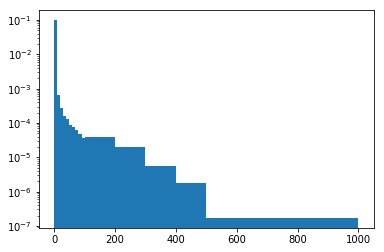

In [19]:
xbins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000]
plt.hist(x=gen_pt, bins=xbins, log=True, density=True)
plt.show()